<a href="https://colab.research.google.com/github/JLALLANOSM/Sis420_LlanosMendoza/blob/main/Parcial_Dos/regLogBin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*******************EXAMEN SEGUNDO PARCIAL - IA I - SIS420****************




#ESTUDIANTE: LLANOS MENDOZA JOSE LUIS ALBERTO 
##CARRERA: ING. SISTEMAS

# Ejercicion de programación - Regresión Logistica

En este ejercicio se implementa regresion logistica y se aplica a dos diferentes datasets.

In [249]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline
#libreria pandas
import pandas as pd
from sklearn.model_selection import train_test_split

--------------------------------------------------------------------------------

##DATA SETS UTLIZADO 
##URL: 

In [250]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [251]:
#leemos el dataset 
#creamos una lista con los valores de y unicos
#podemos ver el numero de clases 
data =pd.read_csv('/content/drive/MyDrive/datasets/wine.csv')
value = list(data["quality"].unique())
print("numero de clases",value)
data.info()

numero de clases ['bad', 'good']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [252]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


#El siguiente codigo es para realizar la Adaptacion de datos, en otras palabras convertimos las caracteristicas cualitativas a cuantitativas, ya que los entrenamiento y pruebas de un algoritmo de IA, los datos deben ser numericos 

In [253]:
import pandas as pd

def csvAdapter(dataset,modificarColumnas,eliminarColumnas):
    data =pd.read_csv(dataset,encoding='latin-1')#lee y carga el archivo del data set a la variable data
    columna = data.columns #asignamos los nombres de columna a la variables columna

    for index in modificarColumnas:
        name = columna[index]
        value = list(data[name].unique())#obetenemos todos lo valores unicos de cada columna
        data[name] = data[name].map(dict(zip(value,[i for i in range(len(value))]))) #aqui es donde hacemos el tratamiento de datos donde a cada valor 
                                                                                    #unico digamos un indice, indice que es numerico ejm 0=femenino, 1=masculino
                                                                                    #zip crea una secuencia de duplas
                                                                                    #ditc convierte en un diccionario asigando a cada value el valor numerico correspondiente
                                                                                    #map se realizar un mapeo reemplazando lo que denifio en el diccionario   
    data = data.drop([columna[index]for index in eliminarColumnas],axis=1)#eliminamos las columnas que no interesan en la resolucion o prediccion del problema   
    data = data.dropna()#eliminamos las filas que contengan valores nulos
    #data = pd.DataFrame(data, columns=columna)
    #dataN = data.to_numpy()
    #print(data.head())
    return data
rutadataset='/content/drive/MyDrive/datasets/wine.csv'  #es la ruta de nuestro dataset
columnaCategoricas = [i for i in range(0, 12) if not i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]# columnas que no necesitan tratamiento
eliminarColumnas=[]#columnas a eliminar
data = csvAdapter(rutadataset, columnaCategoricas, eliminarColumnas)

In [254]:
#btenemos otra vez la lista 
#y vemos que ahora ya son numericos las clases o en este caso binario 0 y 1
value = list(data["quality"].unique())
print("numero de clases",value)

data.info()

numero de clases [0, 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


##2. FUNCION GENERAR DATOS SINTETICO
Utilizamos esta funcion por si el dataset que nos proporcionen pueda tener un numero de **POBLACION MUY BAJA**, y con lo cual nos hace dificil tener un entrenamiento, bueno por lo cual se hace un **aumento de datos**, pero por otra parte **si el aumento de datos no es buena o no tiene una coherencia tal vez adecuada el aprendizaje y prediccion del algoritmo podria empeorar**, de tal manera en esta funcion con unos compañeros y yo trabajando en conjunto tratamos de crear una funcion que nos pueda ayudar a que los **DATOS SINTETICOS** sean lo mas coherente posible, por lo cual pensamos y llegamos a la conclusion de que la mejor manera para una regresion logistica o multiclase seria separar u ordenar por el tipo de clase(osea separar u ordenar el dataset por tipo de clase) y luego utilizar la funcion choice mas random que nos ayuda a generar o mas bien agarrar los valores ya existentes y los copia pero aleatoriamente numeros aleatorios basados en los datos existentes en el dataset y de esta manera vamos generando datos para cada tipo de clase.
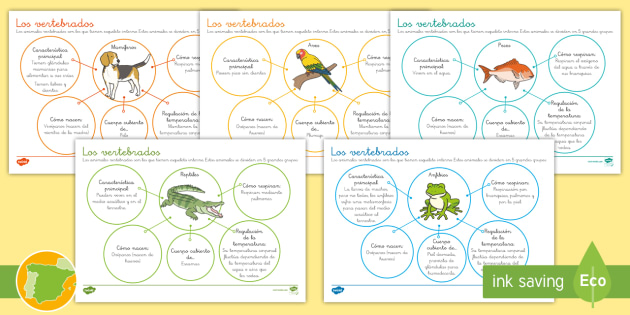


---
El motivo por lo que pensamos que este codigo esta bien es porque aun principio generabamos datos aleatorios sin importar que caracteristicas (hablamos de las X) generaba para una una determinada clase(Hablamos de las Y), en otras palabras mas simples todos se mezclaban y lo cual generaba un entrenamiento y prediccion baja o muy baja. 


In [255]:
value = list(data["quality"].unique())

In [256]:
#aqui es donde separamos el dataset en diferentes clases ente caso es binario y va separa por 1 y 0
ListaData=[]
for i in range(0,len(value)):
    ListaData.append(data[data['quality'] == i])
ListaData[0]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1582,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,0
1583,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,0
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0


In [257]:
ListaData[1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,1
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,1
19,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1593,6.8,0.62,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
1595,5.9,0.55,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1


In [258]:
#para saber la cantidad de datos que tenemos 
data.shape

(1599, 12)

In [259]:
import random
def DatosSinteticos(data,listaData,n_filas,clases):
    nuevos_datos=np.empty([n_filas,len(data.columns)]) #creamos una dataset vacio de las nfilas y columasn que tenga nuestro dataset original
    ColmunaY = np.random.randint(0,clases, n_filas)#generamos aleatoriamente datos para la columna de las Y o los tipos de clases 
    #print(ColmunaY)
    for i in range(len(data.columns)-1):#for para iterar solo las X (caracteristicas de las clases)
        for j in range(0,n_filas):#for para iterar cada fila osea 10000
            pos=ColmunaY[j]#obtenemos la posiscion de la cada y en la columnaY
            columna_i =listaData[pos].iloc[:,i] #obtenemos la columnas donde hay llenar 
            muestras_i=np.random.choice(columna_i,1,replace=True)# llenamos los datos en esa columnas anteriormente calculada 

            probalidad_de_cambio = random.random()#calculamos un numero pequeño para realizar el cambio (una valor entre 0 y 1) 1 no entra
            if probalidad_de_cambio<0.2: #si nuestra probalidad fuese menor 20% o 0.2 sumamos esa cantidad  
                muestras_i=muestras_i+probalidad_de_cambio
            elif probalidad_de_cambio<0.1:#si nuestra probalidad fuese menor 10% o 0.1 restamos esa cantidad 
                muestras_i=muestras_i-probalidad_de_cambio 
            
            muestras_i=muestras_i.round(2) #Redondeamos si al segundo digito si esq nos genera un numero con muchos decimales 
            #np.random.seed()
            nuevos_datos[j:,i]=muestras_i #cargamos nuestras muestras a la matriz vacia que creamos
            nuevos_datos[j:,11]=ColmunaY[j]#cargamos las y a la matriz vacia
    columnas =list(data.columns)#obtenemos los nombres de las columnas del dataset original
    print(nuevos_datos)
    nuevos_datos_df=pd.DataFrame(nuevos_datos,columns=columnas) #creamos un nuevo DataFrame con los nuevos datos y las columnas que tiene el data original
    dataExtend =pd.concat([data,nuevos_datos_df],axis=0)#unimos el dataframe creado y el dataset original y asi conseguimos el data aumentado o extendido
    #print(dataExtend.tail())
    return dataExtend

data=DatosSinteticos(data,ListaData,10000,2)
data.to_csv('data_sintetico.csv',index=False)

[[ 7.5   0.68  0.   ...  0.56  9.4   0.  ]
 [ 6.8   0.37  0.33 ...  0.63 12.1   1.  ]
 [ 6.6   0.31  0.45 ...  0.72 10.8   1.  ]
 ...
 [ 8.04  0.46  0.38 ...  0.86 10.5   1.  ]
 [ 7.5   0.6   0.14 ...  0.72  9.2   0.  ]
 [ 7.5   0.67  0.48 ...  0.62 11.9   1.  ]]


In [179]:
#para saber la cantidad de datos que tenemos 
data.shape
#una vez corrida esta liena de codigo observamos la cantidad de datos generados 

(11599, 12)

In [180]:
data.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              7.40              0.70         0.00            1.90      0.076   
1              7.80              0.88         0.00            2.60      0.098   
2              7.80              0.76         0.04            2.30      0.092   
3             11.20              0.28         0.56            1.90      0.075   
4              7.40              0.70         0.00            1.90      0.076   
...             ...               ...          ...             ...        ...   
9995           7.30              0.80         0.82            2.30      0.110   
9996           7.30              0.43         0.02            1.82      0.120   
9997          10.00              0.53         0.31            8.60      0.060   
9998           8.38              0.58         0.29            1.80      0.270   
9999          12.80              0.24         0.56            2.70      0.320

In [181]:
data = data.to_numpy()#convertimos el dataframe en un dataset tipo numpy

In [182]:
# Cargar datos
# Las 11 primeras columnas contienen la caracteristicas del dataset y la ultima columna
# contiene la etiqueta que indica si el vino es bueno o malo.

#data = np.loadtxt(os.path.join('datasetDiabetes.txt'), delimiter=',')

X, y = data[:,0:11], data[:, 11]
print(X[0])

[ 7.4     0.7     0.      1.9     0.076  11.     34.      0.9978  3.51
  0.56    9.4   ]


##La siguiente linea de codigo sirve para crear x de prueba y x de entrenamiento

In [183]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

Este caso estamos diciendo que la cantidad de x y y prueba sera del 30% y x y y entrenamiento del 70%

In [184]:
y_test.size

3480

In [185]:
y_train[:10]

array([1., 0., 0., 1., 1., 0., 1., 1., 1., 1.])

### 1.1 Visualizar los datos

In [186]:
def plotData(X_train, y_train):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y 
    # o para los negativos.
    
    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], X[pos, 2], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], X[neg, 2], 'ko', mfc='y', ms=8, mec='k', mew=1)
    

Se llama a la función implementada para mostrar los datos cargados:

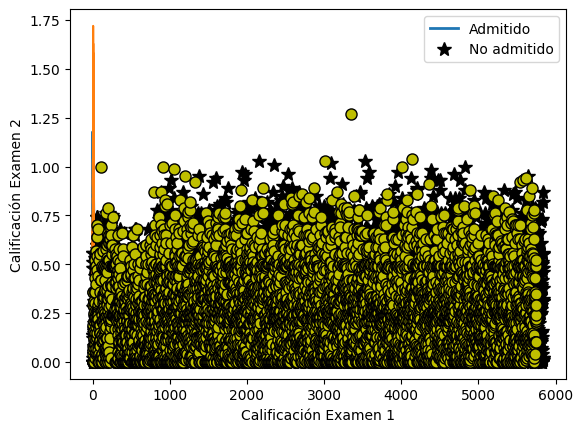

In [187]:
plotData(X_train, y_train)
# adiciona etiquetas para los ejes
pyplot.xlabel('Calificación Examen 1')
pyplot.ylabel('Calificación Examen 2')
pyplot.legend(['Admitido', 'No admitido'])
pass

<a id="section1"></a>
### 1.2 Implementacion

#### 1.2.1 Fución Sigmoidea

La hipotesis para la regresión logistica se define como:

$$ h_\theta(x) = g(\theta^T x)$$

donde la función $g$ is la función sigmoidea. La función sigmoidea se define como: 

$$g(z) = \frac{1}{1+e^{-z}}$$.

La sigmoide debe generar valores cercanos 0. La evaluacion de `sigmoid(0)` debe dar un resultado exacto de 0.5. Esta funcion tambien debe poder trabajar con vectores y matrices.

In [188]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)
  
    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [189]:
# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


<a id="section2"></a>
#### 1.2.2 Función de Costo y Gradiente

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X. 

In [190]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción. 
m, n = X_train.shape
# Agraga el termino de intercepción a A
X_train = np.concatenate([np.ones((m, 1)), X_train], axis=1)

print(X_train[5])

[1.00e+00 6.90e+00 6.50e-01 2.70e-01 2.00e+00 8.00e-02 3.60e+01 8.50e+01
 1.00e+00 3.62e+00 1.60e+00 9.60e+00]


In [214]:

def calcularCosto(theta, X_train, y_train):
    # Inicializar algunos valores utiles
    m = y_train.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X_train.dot(theta.T))
    J = (1 / m) * np.sum(-y_train.dot(np.log(h)) - (1 - y_train).dot(np.log(1 - h)))
    return J

In [215]:
def descensoGradiente(theta, X_train, y_train, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []
    
    for i in range(num_iters):
        h = sigmoid(X_train.dot(theta.T))
        theta = theta - (alpha / m) * (h - y_train).dot(X_train)
       
        J_history.append(calcularCosto(theta, X_train, y_train))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-0.25541132 -0.00427251 -0.6863641   0.21591348 -0.07676365 -0.08925362
 -0.01424579 -0.01461976 -0.25771793 -0.79442139  0.22958775  0.43788925]
Diagnostico de Diabetes (usando el descenso por el gradiente):0.6529414489365665


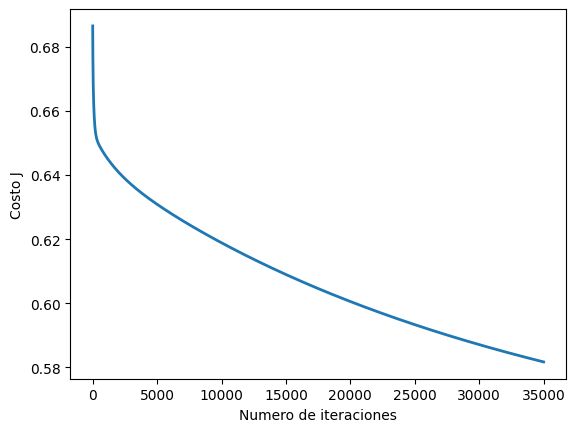

In [227]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 35000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(12)
theta, J_history = descensoGradiente(theta, X_train, y_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si buena o mala el vino 
#X_array = [1, 7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4]
X_array = np.insert(X_test[1], 0, 1)
aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(f"Vino Bueno o Malo (usando el descenso por el gradiente):{aprueba}")

In [226]:
y_test[1]

0.0

#Estas serian las mejores Thetas

In [221]:
print('Mejores Thetas: {:s}'.format(str(theta)))

Mejores Thetas: [-0.19250354 -0.01627435 -0.51505015  0.16061569 -0.08294247 -0.06603264
 -0.01507528 -0.01499518 -0.19532612 -0.61406109  0.16557784  0.37798407]


In [230]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y_train.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X_train.dot(theta.T))
    
    J = (1 / m) * np.sum(-y_train.dot(np.log(h)) - (1 - y_train).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y_train).dot(X)
    
    return J, grad

Se prueba la funcion `costFunction` utilizando dos casos de prueba para $\theta$.

In [231]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X_train, y_train)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[-2.89444513e-03 -1.10279591e-01  2.76561153e-02 -1.59410026e-02
  8.16295110e-03  2.79326272e-03  3.28062569e-01  3.62967361e+00
 -3.06333415e-03 -9.83865008e-03 -2.23481956e-02 -2.51271708e-01]
Gradiente en theta inicial (zeros):
	[-0.0029, -0.1103, 0.0277, -0.0159, 0.0082, 0.0028, 0.3281, 3.6297, -0.0031, -0.0098]
Gradiente esperado (aproximado):
	[-0.1000, -12.0092, -11.2628]



In [232]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([-0.03560958, -0.03877589, -0.09761781, 0.02842375, -0.05596489, -0.01218415,
 -0.0161689,  -0.01612162, -0.03814792, -0.12021438, 0.02638176, 0.19821256])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X_train, y_train)

print('Costo en theta prueba: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.218\n')

print('Gradiente en theta prueba:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[0.043, 2.566, 2.647]')

[-0.03560958 -0.03877589 -0.09761781  0.02842375 -0.05596489 -0.01218415
 -0.0161689  -0.01612162 -0.03814792 -0.12021438  0.02638176  0.19821256]
Costo en theta prueba: 0.632
Costo esperado (aproximado): 0.218

Gradiente en theta prueba:
	[0.0168, 0.0369, 0.0347, -0.0084, 0.0282, 0.0046, 0.0943, 0.2051, 0.0173, 0.0559]
Gradiente esperado (aproximado):
	[0.043, 2.566, 2.647]


#### 1.2.3 Parámetros de aprendizaje usando `scipy.optimize`

En el codigo anterior se encontró los parámetros óptimos de un modelo de regresión lineal al implementar el descenso de gradiente. Se implemento una función de costo y se calculó su gradiente, utilizando el algoritmo del descenso por el gradiente.

En lugar de realizar los pasos del descenso por el gradiente, se utilizará el [módulo `scipy.optimize`] (https://docs.scipy.org/doc/scipy/reference/optimize.html). SciPy es una biblioteca de computación numérica para `python`. Proporciona un módulo de optimización para la búsqueda y minimización de raíces. A partir de `scipy 1.0`, la función` scipy.optimize.minimize` es el método a utilizar para problemas de optimización (tanto restringidos como no restringidos).

For logistic regression, you want to optimize the cost function $J(\theta)$ with parameters $\theta$.
Concretely, you are going to use `optimize.minimize` to find the best parameters $\theta$ for the logistic regression cost function, given a fixed dataset (of X and y values). You will pass to `optimize.minimize` the following inputs:

Para la regresión logística, se desea optimizar la función de costo $J(\theta)$ con los parámetros $\theta$.
Concretamente, se va a utilizar `optimize.minimize` para encontrar los mejores parámetros $\theta$ para la función de costo de regresión logística, dado un dataset fijo (de valores X e y). Se pasara a `optimize.minimize` las siguientes entradas:

- `costFunction`: Una función de costo que, cuando se le da el dataset de entrenamiento y un $\theta$ particular, calcula el costo de regresión logística y el gradiente con respecto a $\theta$ para el dataset(X, y). Es importante tener en cuenta que solo se pasa el nombre de la función sin el paréntesis. Esto indica que solo proporcionamos una referencia a esta función y no evaluamos el resultado de esta función.
- `initial_theta`: Los valores iniciales de los parametros que se tratan de optimizar.
- `(X, y)`: Estos son argumentos adicionales a la funcion de costo.
- `jac`: Indicación si la función de costo devuelve el jacobiano (gradiente) junto con el valor de costo. (True)
- `method`: Método / algoritmo de optimización a utilizar
- `options`: Opciones adicionales que pueden ser específicas del método de optimización específico. Solo se indica al algoritmo el número máximo de iteraciones antes de que termine.

Si se ha completado la `costFunction` correctamente,`optimize.minimize` convergerá en los parámetros de optimización correctos y devolverá los valores finales del costo y $\theta$ en un objeto de clase.

Al usar `optimize.minimize`, no se tuvo que escribir ningún bucle ni establecer una tasa de aprendizaje como se hizo para el descenso de gradientes. Todo esto se hace mediante `optimize.minimize`: solo se necesita proporcionar una función que calcule el costo y el gradiente.

A continuación, se tiene el código para llamar a `optimize.minimize` con los argumentos correctos.

In [234]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X_train, y_train),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Theta esperado (aproximado):\n\t[-25.161, 0.206, 0.201]')

Costo con un valor de theta encontrado por optimize.minimize: 0.513
Costo esperado (aproximado): 0.203

theta:
	[-10.591, 0.113, -3.163]
Theta esperado (aproximado):
	[-25.161, 0.206, 0.201]


<ipython-input-234-ce59733c8675>:7: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  res = optimize.minimize(costFunction,


Una vez que se completa `optimize.minimize`, se usa el valor final de $\theta$ para visualizar el límite de decisión en los datos de entrenamiento.

Para hacerlo, se implementa la función `plotDecisionBoundary` para trazar el límite de decisión sobre los datos de entrenamiento.

In [235]:
def plotDecisionBoundary(plotData, theta, X, y):
    """
    Grafica los puntos X y Y en una nueva figura con un limite de desicion definido por theta.
    the data points X and y into a new figure with the decision boundary defined by theta.
    Grafica los puntos con * para los ejemplos positivos y con o para los ejemplos negativos.
    
    Parametros:
    ----------
    plotData : func
        A function reference for plotting the X, y data.

    theta : array_like
        Parametros para la regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Data set de entrada. Se supone que X es una de las siguientes:
            1) Matriz Mx3, donde la primera columna es una columna de unos para intercepción.
            2) Matriz MxN, N> 3, donde la primera columna son todos unos.

    y : array_like
        Vector de datos de etiquetas de la forma (m, ).
    """
    # hacer que theta sera un arreglo numpy
    theta = np.array(theta)

    # Graficar los datos (recordar que la primera columna en X es la intercepción)
    plotData(X[:, 1:3], y)

    if X.shape[1] <= 3:
        # Solo se requieren 2 puntos para definir una linea, para lo cual se eligen dos puntos finales
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calcular la línea límite de decisión
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        print(plot_x)
        print(plot_y)
        # Graficar y ajustar los ejes para una mejor visualización
        pyplot.plot(plot_x, plot_y)

        # Leyenda, especifica para el ejercicio
        pyplot.legend(['Admitido', 'No admitido', 'Limite de decisión'])
        pyplot.xlim([30, 100])
        pyplot.ylim([30, 100])
    else:
        # Rango de la grilla
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evalua z = theta*x sobre la grilla
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T  # importante transponer z antes de llamar al contorno
        # print(z)

        # Plot z = 0
        pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)


NameError: ignored

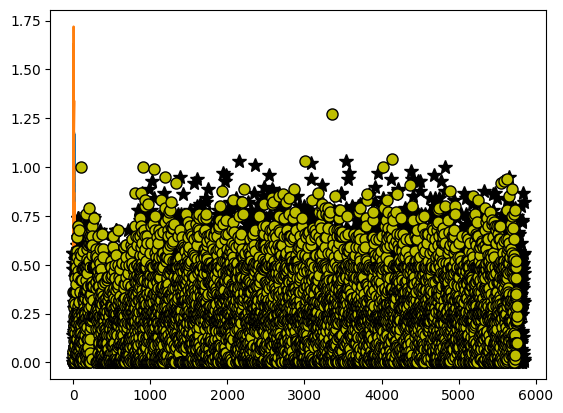

In [236]:
# Graficar limites
plotDecisionBoundary(plotData, theta, X, y)

<a id="section4"></a>
#### 1.2.4 Evaluación de la regresión logistica

Después de aprender los parámetros, se puede usar el modelo para predecir si un estudiante en particular será admitido. Para un estudiante con una puntuación en el Examen 1 de 45 y una puntuación en el Examen 2 de 85, debe esperar ver una probabilidad de admisión de 0,776. Otra forma de evaluar la calidad de los parámetros que hemos encontrado es ver qué tan bien predice el modelo aprendido en nuestro conjunto de entrenamiento. 

In [238]:
def predict(theta, X_train):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).
    
    X : array_like
        Datos utilizados para el calculo de las predicciones. 
        La fila es el numero de los puntos para calcular las predicciones, 
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X. 
    """
    m = X_train.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X_train.dot(theta.T)))
    return p

Una vez entrenado el modelo se procede a realizar la prediccion y evaluación de los resultados de predecir cual es el valor que vota el modelo para todos los datos utilizados en el entrenamiento.

In [248]:
#  Predice prueba
X_prueba = np.insert(X_test[1], 0, 1)#aumentado 1 a nuestro x de prueba 
prob = sigmoid(np.dot(X_prueba, theta))
print('Para datos de prueba : {:.3f}%'.format(prob))
#print('Para datos de prueba : {:.3f}%'.format(prob*100))
print('Valor esperado: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X_train)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_train) * 100))
print('Precisión esperada (aproximadamente): 89.00 %')

Para datos de prueba : 0.624%
Valor esperado: 0.775 +/- 0.002

Precisión de entrenamiento: 74.91 %
Precisión esperada (aproximadamente): 89.00 %
